# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM, ES2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Twitter Sentiment Classification

**Many companies are built around lessening one’s environmental impact or carbon footprint.** They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, **EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.**

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies

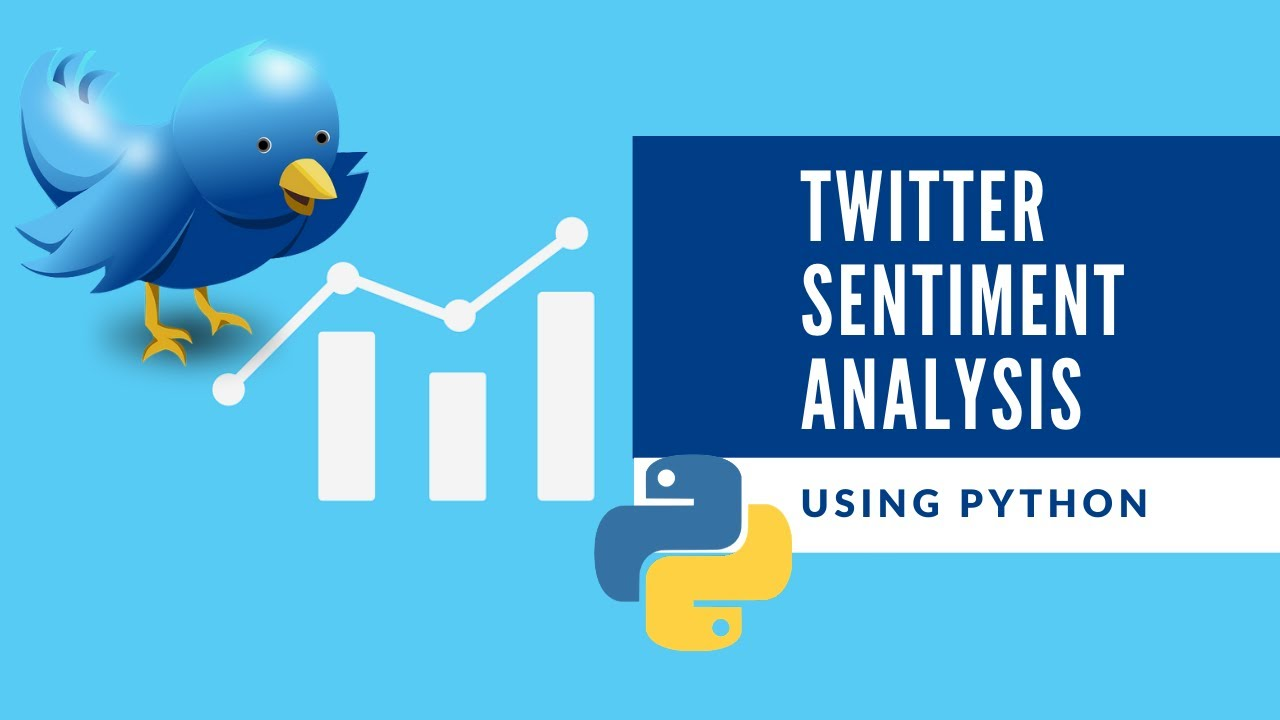

### Meet The Team_ES2
- 1. Lebuso Tsilo
- 2. Jabulile Mkhwanazi
- 3. Peakanyo Kgomosotho
- 4. Daisy Mangue
- 5. Vusumzi Mbiyo

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering and Preprocessing </a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

# Comet Experiment

Comet is an experimentation platform, which permits testing Machine Learning projects, from the beginning up to the final monitoring

In [ ]:
# Import comet_ml at the top of your file
#from comet_ml import Experiment

# Create an experiment with your api key
"""""
experiment = Experiment(
    api_key="TaVXMUoLUETmSvHMTSLEMNb7s",
    project_name="2207ftds-team-es2",
    workspace="philiase",
)

# Run your code and go to /
"""""

Introduction

In recent years many companies have adopted the use of social media platforms and social media data as an alternative way to engage with customers experience , to build brand awareness and increase customer base through advertisement. The data that is generated within social media is classied as unstructured data. The sentiment from this data are analysed using NLP, which is natural language processing which refers to a process of analysing text to determine the author's emotion or attitude towards their brands, products and services.

Problem Statement

Many businesses have made significant commitments to demonstrate that acting on climate change is good for the earth and is also a smart business strategy. There has been a growing demand for companies to analyse social media data with the intention of gauging how their product/service may be received by consumers. This will also assist companies access a broad base of consumer sentiment, spanning multiple demographic and geographic categories for better informative future marketing strategies.

Objectives

1. Perform data analysis to investigate if there are any errors and unnecessary data
2. Perform data cleaning to remove unnecessary data and errors
3. Perform EDA to gain better insight of the data
4. Create engineering features to improve the performance of the model
5. Build a model that is capable of classifying whether or not a person believes in climate change based on the tweet data
6. Evaluate the accuracy of the best machine learning model


1. <a class="anchor" id="1.1"></a>
<a href=#cont>Importing Packages</a>

2. <a class="anchor" id="1.1"></a>
<a href=#cont>loading data</a>

3. <a class="anchor" id="1.1"></a>
<a href=#cont>Exploratory Data Analysis(EDA)</a>

4. <a class="anchor" id="1.1"></a>
<a href=#cont>Data Engineering and  Preprocessing</a>

5. <a class="anchor" id="1.1"></a>
<a href=#cont>Modeling</a>

6. <a class="anchor" id="1.1"></a>
<a href=#cont>Conclusion</a>

In [127]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt # Visualization packages used to plot graphs
%matplotlib inline
from scipy import stats # Package for statistics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from wordcloud import WordCloud
from os import makedirs
from os import path
# Libraries for data preparation and model building
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
import nltk
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
# sklearn
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import RidgeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import json


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [44]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')


Data size and Structure

An important step before we attempt any analysis is to view the basic structure of our data so we may become more familiar with it. This is why, we employ some basic methods such as calling .info() and .shape on the data, as well as viewing the first few entries with .head().

In [ ]:
#view the datasets
display(df_train.head())
display(df_test.head())

#looking at the information of the datasets
df_train.info()
df_test.info()

#looking at the shape of the datasets
df_train.shape
df_test.shape


Overview of the datasets

Each tweet is labelled as one of the following classes:

  1.  [2] News: the tweet links to factual news about climate change

   2.  [1] Pro: the tweet supports the belief of man-made climate change
    [0] Neutral: the tweet neither 3. supports nor refutes the belief of man-made climate change
    
   3. [-1] Anti: the tweet does not believe in man-made climate change

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using graphs or through some python functions. 

In [ ]:
df_train.shape

In [ ]:
#checking for missing/null value
df_test.isnull().sum()

In [ ]:
#rows and columns in the dataset
print('Count of columns in the data is:  ', len(df_train.columns))
print('Count of rows in the data is:  ', len(df_train))

In [ ]:
#checking unique target values
df_train['sentiment'].unique()

In [ ]:
# Taking a look at the statistics of numerical columns
df_train[['sentiment','tweetid']].describe().T

In [ ]:
#checking for outliers on tweet ID columns
#fig, axes = plt.subplots(0, 0, figsize = (15,15))
sns.boxplot(data = df_train , x='tweetid')

In [130]:
# Separate sentiment into classes 
Neutral = df_train[df_train['sentiment']==0]
Pro = df_train[df_train['sentiment']==1]
Anti = df_train[df_train['sentiment']==-1]
News = df_train[df_train['sentiment']==2]

In [ ]:
# Get all possible labels
labels = df_train['sentiment'].unique()
heights = [len(pro),len(news),len(neutral),len(anti)]
plt.bar(labels,heights,color='c')
plt.xticks(labels,['pro','news', 'neutral', 'anti'])
plt.xlabel('sentiments')
plt.ylabel("number of observations")
plt.title('Distribution of classes')

The above graph shows us the tweets destribution according to their class, from the graph we can observe that we have over 8000 pro tweets, 3900 news tweets, 2351 neutral tweets and 1223 ani tweets, this then tells us that there is data imbalance as there is huge difference between the pro class and the other classes.

In [ ]:
###### plt.figure(figsize=(15,10))
plt.title('Percentage of sentiment', fontsize=15)
df_train.sentiment.value_counts().plot(kind='pie', labels=['(Pro)', '(News)', '(Neutral)', '(Anti)'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

On the above pie graph is shows that most people are reacting positively(pro) towards the climate change because they are a lot of tweets that are positive as it stands on 54% compared to the others. We can also see that least people are against the climate change.

***length of tweets per class***

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11,7))

axs[0, 0].set_title('pro')
axs[0, 0].hist(pro.message.str.len(),bins=50,label='pro',color='grey')

axs[1, 0].set_title('news')
axs[1, 0].hist(news.message.str.len(),bins=50,label='news',color='lime')

axs[0, 1].set_title('neutral')
axs[0, 1].hist(neutral.message.str.len(),bins=50,label='neutral',color='brown')

axs[1, 1].set_title('anti')
axs[1, 1].hist(anti.message.str.len(),bins=50,label='anti',color='blue')

for ax in axs.flat:
    ax.set(xlabel='length of tweets', ylabel='number of tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<a id="four"></a>
## 4. Data Engineering and Preprocessing 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Data processing occurs when data is collected and translated into usable information. Usually performed by a data scientist or team of data scientists, it is important for data processing to be done correctly as not to negatively affect the end product, or data output.

In [45]:
# combining the train data and test data
df = df_train.copy()
df_t =df_test.copy()

In [46]:
df.shape

(15819, 3)

In [5]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...,625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is ...",466954



Tweets Cleaning

To remove the noise caused by connectors or otherwise called Stop words remove special characters, spaces or Tabs emojies,urls,hashtags.

***removing @"user" from all tweets***


In [47]:
def remove_pattern(input_txt,pattern):
    r_find = re.findall(pattern, input_txt)
    for word in r_find:
        input_txt = re.sub(word, '',input_txt)
    return input_txt

In [48]:
# removing twitter handles @ "user"
df['message'] = np.vectorize(remove_pattern)(df['message'],'@[\w]*')
df[['message']].head()

,message
0,PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...
1,It's not like we lack evidence of anthropogenic global warming
2,RT : Researchers say we have three years to act on climate change before it’s too late...
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....
4,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the p..."


In [49]:
#changing all tweets in to lowercase
df['message'] = df['message'].apply(lambda x: x.lower())
df.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming an...,625221
1,1,it's not like we lack evidence of anthropogenic global warming,126103
2,2,rt : researchers say we have three years to act on climate change before it’s too late...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change https://t....,573736
4,1,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the p...",466954


In [50]:
#removing punctuations
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [51]:
def remove_punctuation(data):
    return ''.join([l for l in data if l not in string.punctuation])

In [52]:
df['message'] = df['message'].apply(remove_punctuation)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before it’s too late ...,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change httpstco44wot...,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls ...,466954


In [53]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [54]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [55]:
df['message'] = df['message'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before it’s too late ...,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change httpstco44wot...,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls ...,466954


***Cleaning and removing URL’s***

In [57]:
def remove_emojis(string):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)

df['message'] = df['message'].apply(remove_emojis)

In [58]:
def tweet_cleaner(tweet):
    
    """
    This function is necessary for removing mentions, hashtags, 
    and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)     
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

df['message'] = df['message'].apply(tweet_cleaner)

In [59]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)


In [60]:
df['message'] = df['message'].apply(lambda x: cleaning_URLs(x))
df[['message']].head()

,message
0,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...
1,its not like we lack evidence of anthropogenic global warming
2,rt researchers say we have three years to act on climate change before it’s too late h...
3,todayinmaker wired 2016 was a pivotal year in the war on climate change httpstco44wotx...
4,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls e...


***Cleaning and removing Numeric numbers***

In [61]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [62]:
df['message'] = df['message'].apply(lambda x: cleaning_numbers(x))
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before it’s too late h...,698562
3,1,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd,573736
4,1,rt its and a racist sexist climate change denying bigot is leading in the polls elect...,466954


In [63]:
#remmoving the Re Tweets 
pattern_url = r'rt\s'
subs_url = r'retweet '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [64]:
df[['message']]

,message
0,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...
1,its not like we lack evidence of anthropogenic global warming
2,retweet researchers say we have three years to act on climate change before it’s too l...
3,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd
4,retweet its and a racist sexist climate change denying bigot is leading in the polls ...
...,...
15814,retweet they took down the material on global warming lgbt rights and health care but ...
15815,retweet how climate change could be breaking up a millionyearold relationship httpstco...
15816,notiven retweet nytimesworld what does trump actually believe about climate change ric...
15817,retweet hey liberals the climate change crap is a hoax that ties to agenda\nthe climat...


In [65]:
def createTokenizedArray(sentences):
    '''
    Create lower case array of words with no punctuation.
    :param sentences: array or series of texts
    :return: lower case array of words with no punctuation.
    '''
    # Initialize tokenizer and empty array to store modified sentences.
    tokenizer = RegexpTokenizer(r'\w+')
    tokenizedArray = []
    for i in range(0, len(sentences)):
        
        sentence = sentences[i]

        # Split sentence into array of words with no punctuation.
        words = tokenizer.tokenize(sentence)

        # Append word array to list.
        tokenizedArray.append(words)

    # print(tokenizedArray)
    return tokenizedArray  # send modified contents back to calling function.

In [66]:
#creating token for the clean tweets
df['tweet_token'] = createTokenizedArray(df['message'])
df.head()

,sentiment,message,tweetid,tweet_token
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global..."
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[its, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,retweet researchers say we have three years to act on climate change before it’s too l...,698562,"[retweet, researchers, say, we, have, three, years, to, act, on, climate, change, befo..."
3,1,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd,573736,"[todayinmaker, wired, was, a, pivotal, year, in, the, war, on, climate, change, httpst..."
4,1,retweet its and a racist sexist climate change denying bigot is leading in the polls ...,466954,"[retweet, its, and, a, racist, sexist, climate, change, denying, bigot, is, leading, i..."


In [67]:
def removeStopWords(tokenList):
    '''
    Create array of words with no punctuation or stop words.
    :param tokenList: tokenized list
    :return: array of words with no punctuation or stop words.
    '''
    stopWords = set(stopwords.words('english'))
    shorterSentences = []  # Declare empty array of sentences.

    for sentence in tokenList:
        shorterSentence = []  # Declare empty array of words in single sentence.
        for word in sentence:
            if word not in stopWords:

                # Remove leading and trailing spaces.
                word = word.strip()

                # Ignore single character words and digits.
                if (len(word) > 1 and word.isdigit() == False):
                    # Add remaining words to list.
                    shorterSentence.append(word)
        shorterSentences.append(shorterSentence)
    return shorterSentences

In [68]:
df['tweet_token'] = removeStopWords(df['tweet_token'])

In [69]:
#.download(['punkt','stopwords'])

In [70]:
df.head()

,sentiment,message,tweetid,tweet_token
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warmin..."
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[like, lack, evidence, anthropogenic, global, warming]"
2,2,retweet researchers say we have three years to act on climate change before it’s too l...,698562,"[retweet, researchers, say, three, years, act, climate, change, late, httpstcowdtkdurf..."
3,1,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd,573736,"[todayinmaker, wired, pivotal, year, war, climate, change, httpstcowotxtlcd]"
4,1,retweet its and a racist sexist climate change denying bigot is leading in the polls ...,466954,"[retweet, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]"


In [71]:
def stemWords(sentenceArrays):
    '''
    Removes suffixes and rebuilds the sentences.
    :param sentenceArrays: stentences list
    :return: array of sentences without suffixes
    '''
    ps = PorterStemmer()
    stemmedSentences = []
    for sentenceArray in sentenceArrays:
        stemmedArray = []  # Declare empty array of words.
        for word in sentenceArray:
            stemmedArray.append(ps.stem(word))  # Add stemmed word.

        # Convert array back to sentence of stemmed words.
        delimeter = ' '
        sentence = delimeter.join(stemmedArray)

        # Append stemmed sentence to list of sentences.
        stemmedSentences.append(sentence)
    return stemmedSentences

In [72]:
#creating tweet_stemmed column
df['tweet_stemmed'] = stemWords(df['tweet_token'])
df.head()

,sentiment,message,tweetid,tweet_token,tweet_stemmed
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warmin...",polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait httpstcoy...
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[like, lack, evidence, anthropogenic, global, warming]",like lack evid anthropogen global warm
2,2,retweet researchers say we have three years to act on climate change before it’s too l...,698562,"[retweet, researchers, say, three, years, act, climate, change, late, httpstcowdtkdurf...",retweet research say three year act climat chang late httpstcowdtkdurf httpstcozanpt
3,1,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd,573736,"[todayinmaker, wired, pivotal, year, war, climate, change, httpstcowotxtlcd]",todayinmak wire pivot year war climat chang httpstcowotxtlcd
4,1,retweet its and a racist sexist climate change denying bigot is leading in the polls ...,466954,"[retweet, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]",retweet racist sexist climat chang deni bigot lead poll electionnight



Lemmatisation

Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results. Because search engine algorithms use lemmatization, the user is free to query any inflectional form of a word and get relevant results

In [74]:
def lemmatizeWords(sentenceArrays):
    '''
    Removes suffixes and rebuilds the sentences.
    :param sentenceArrays: stentences list
    :return: array of sentences without suffixes
    '''
    lemmatizer = WordNetLemmatizer()
    lemmatizerSentences = []
    for sentenceArray in sentenceArrays:
        lematizedArray = []  # Declare empty array of words.
        for word in sentenceArray:
            lematizedArray.append(lemmatizer.lemmatize(word))  # Add stemmed word.

        # Convert array back to sentence of stemmed words.
        delimeter = ' '
        sentence = delimeter.join(lematizedArray)

        # Append stemmed sentence to list of sentences.
        lemmatizerSentences.append(sentence)
    return lemmatizerSentences

In [75]:
#creating tweet_stemmed column
df['tweet_lemmatized'] = lemmatizeWords(df['tweet_token'])
df.head()

,sentiment,message,tweetid,tweet_token,tweet_stemmed,tweet_lemmatized
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and...,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warmin...",polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait httpstcoy...,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait http...
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[like, lack, evidence, anthropogenic, global, warming]",like lack evid anthropogen global warm,like lack evidence anthropogenic global warming
2,2,retweet researchers say we have three years to act on climate change before it’s too l...,698562,"[retweet, researchers, say, three, years, act, climate, change, late, httpstcowdtkdurf...",retweet research say three year act climat chang late httpstcowdtkdurf httpstcozanpt,retweet researcher say three year act climate change late httpstcowdtkdurf httpstcozanpt
3,1,todayinmaker wired was a pivotal year in the war on climate change httpstcowotxtlcd,573736,"[todayinmaker, wired, pivotal, year, war, climate, change, httpstcowotxtlcd]",todayinmak wire pivot year war climat chang httpstcowotxtlcd,todayinmaker wired pivotal year war climate change httpstcowotxtlcd
4,1,retweet its and a racist sexist climate change denying bigot is leading in the polls ...,466954,"[retweet, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]",retweet racist sexist climat chang deni bigot lead poll electionnight,retweet racist sexist climate change denying bigot leading poll electionnight


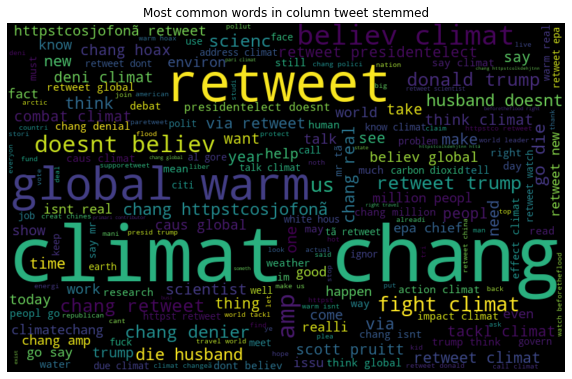

In [76]:
#visualizing all the words in a column tweet_stemmed in our data using wordcloud plot
words = ' '.join([text for text in df['tweet_stemmed']])
wordcloud = WordCloud(width=800,  height=500, random_state = 21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most common words in column tweet stemmed')
plt.show()

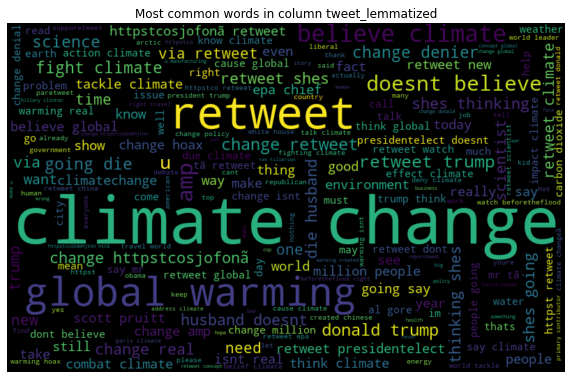

In [77]:
#visualizing all the words in a column tweet_stemmed in our data using wordcloud plot
words = ' '.join([text for text in df['tweet_lemmatized']])
wordcloud = WordCloud(width=800,  height=500, random_state = 21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most common words in column tweet_lemmatized')
plt.show()

## Vectorization
Now the tweet_lemmatized sentences will be vectorized. It essentially transforms all the existing words into numbers so they can be fed to various big data algorithms.

In [78]:
tweet_lemmatized = df['tweet_lemmatized']

In [117]:
def vectorizeList(lemmatizedList, ngramRangeStart, ngramRangeEnd):
    '''
    Creates a matrix of word vectors.
    :param lemmatizedList: stemmed sentence list
    :return: matrix of word vectors and vocabulary dictionary
    '''
    cv = CountVectorizer(lowercase=True, stop_words='english', max_features=25,analyzer='word',binary=True, ngram_range=(ngramRangeStart, ngramRangeEnd))
    cv.fit(lemmatizedList)
    X = cv.transform(lemmatizedList)

    return X, cv.vocabulary_

In [118]:
vectorizedTweets, vectorDictionary = vectorizeList(tweet_lemmatized, 1, 1)

In [160]:
vectorizedTweets.shape

(15819, 25)

In [161]:
# extracting features
#from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer2 = TfidfVectorizer(ngram_range = (1,3))
#V_train_Xf = vectorizer2.fit_transform(X)
#y=df['sentiment'] = vectorizer2.transform(X_testf)

# Import the scaler module
#from sklearn import preprocessing
#scaler = preprocessing.MaxAbsScaler()

# Scale data
#X_Train_f = scaler.fit_transform(V_train_Xf)
#X_Test_f = scaler.transform(V_test_Xf)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

Data modeling is the process of producing a descriptive diagram of relationships between various types of information that are to be stored in a database. One of the goals of data modeling is to create the most efficient method of storing information while still providing for complete access and reporting.

In [83]:
X=vectorizedTweets
y=df['sentiment']

Splitting the dataset into the training set and test set


In [84]:
'''
creating the Test Train split
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.75, random_state =50)

In [85]:
def evaluateModel(model, X_test, y_test, title):
    '''
    print out classification scores
    :param model: used model
    :param X_test:
    :param y_test:
    :param title: title of the model
    '''
    print("\n*** " + title + " ***")
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    f1 = metrics.f1_score(y_test, predictions, average='weighted')

    clsScoreDict = {
        "accuracy": accuracy
        , "recall": recall
        , "precision": precision
        , "f1": f1
    }

    print("Accuracy:  " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall:    " + str(recall))
    print("F1:        " + str(f1))
    print("\n\n")

    return clsScoreDict

In [86]:
def title_(model):
    modelType = model.__class__.__name__
    return modelType

In [87]:
def showFormattedConfusionMatrix(y_test, y_predicted):
    '''
    Draw the confusion matrix.
    :param y_test
    :param y_predicted
    :return:
    '''
    # print a simple confusion matrix
    cm = metrics.confusion_matrix(y_test.values, y_predicted)
    print(cm)

    # Show confusion matrix with colored background.
    Index = ['Actual -1', 'Actual 0', 'Actual 1', 'Actual 2', ]
    Cols = ['Pred -1', 'Pred 0', 'Pred 1', 'Pred 2']
    df = pd.DataFrame(cm, index=Index, columns=Cols)
    plt.figure(figsize=(4, 4))

    ax = sns.heatmap(df, cmap='Blues', annot=True, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set(title="Movie Review Sentiment")
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                       horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0,
                       horizontalalignment='right')

In [82]:
# bi-gram vectorization
#NGRAM_RANGE_START = 2
#NGRAM_RANGE_END = 2

#vectorizedTweets2, vectorDictionary2 = vectorizeList(vectorizedTweets, NGRAM_RANGE_START, NGRAM_RANGE_END)

In [ ]:
# tri-gram vectorization
#NGRAM_RANGE_START = 3
#NGRAM_RANGE_END = 3

#vectorizedTweets3, vectorDictionary3 = vectorizeList(vectorizedTweets, NGRAM_RANGE_START, NGRAM_RANGE_END)

In [ ]:
# bi-gram & tri-gram vectorization
#NGRAM_RANGE_START = 2
#NGRAM_RANGE_END = 3

#vectorizedTweets23, vectorDictionary23 = vectorizeList(vectorizedTweets, NGRAM_RANGE_START, NGRAM_RANGE_END)


# Model building

We decided to use a few different types of models for our data set which is:
1. Logistic regression
2. Decision Tree
3. Random Forest Classifier 
4. Extra Trees Classifier
5. Linear Support Vector Classifier (SVC)
6. Bernoulli Naive Bayes
7. K Neighbors Classifier


## 1. Logistic Regression

Logistic regression is commonly used for prediction and classification problems. Some of these use cases include: Fraud detection: Logistic regression models can help teams identify data anomalies, which are predictive of fraud

In [155]:
log_reg =LogisticRegression()

In [156]:
log = log_reg.fit(X_train, y_train)

In [157]:
y_prediction_reg = log_reg.predict(X_test)


*** LogisticRegression ***
Accuracy:  0.6837758112094395
Precision: 0.6725506111815177
Recall:    0.6837758112094395
F1:        0.6668392636889995



[[ 290  153  457   72]
 [  57  633  912  128]
 [  94  328 5493  525]
 [  16   91  919 1697]]


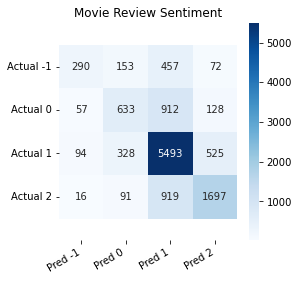

In [158]:
lrScoreDict = evaluateModel(log, X_test, y_test, title_(log_reg))
showFormattedConfusionMatrix(y_test, y_prediction_reg)

## 2. Decision Tree

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [97]:
Dec_Tree = DecisionTreeClassifier(max_depth=20)
Dec_Tree_fit = Dec_Tree.fit(X_train, y_train)

In [98]:
y_prediction_Tree = Dec_Tree.predict(X_test)


*** DecisionTreeClassifier ***
Accuracy:  0.5900547829751369
Precision: 0.5698615733609982
Recall:    0.5900547829751369
F1:        0.5563604974789617



[[ 121  170  622   59]
 [  13  457 1141  119]
 [  77  369 5320  674]
 [  17  113 1490 1103]]


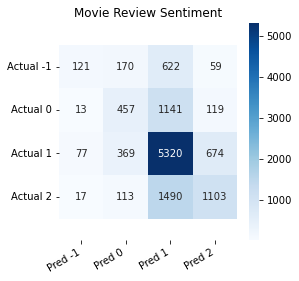

In [100]:
TreeScoreDict = evaluateModel(Dec_Tree_fit, X_test, y_test, title_(Dec_Tree))
showFormattedConfusionMatrix(y_test, y_prediction_Tree)

## 3. Random Forest Classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [101]:
RFC = RandomForestClassifier()
RFC_fit = RFC.fit(X_train, y_train)

In [102]:
y_prediction_RFC = Dec_Tree.predict(X_test)


*** RandomForestClassifier ***
Accuracy:  0.6458491361146228
Precision: 0.6568524406468332
Recall:    0.6458491361146228
F1:        0.608073420026464



[[ 121  170  622   59]
 [  13  457 1141  119]
 [  77  369 5320  674]
 [  17  113 1490 1103]]


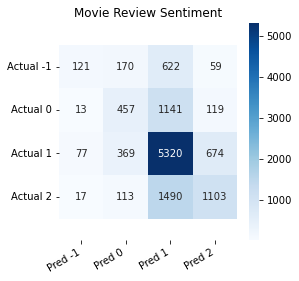

In [104]:
rfScoreDict = evaluateModel(RFC_fit, X_test, y_test, title_(RFC))
showFormattedConfusionMatrix(y_test, y_prediction_RFC)

## 4. Extra Trees Classifier

Extra trees (short for extremely randomized trees) is an ensemble supervised machine learning method that uses decision trees and is used by the Train Using AutoML tool. See Decision trees classification and regression algorithm for information about how decision trees work.

In [107]:
Xtree = ExtraTreesClassifier()
Xtree_fit = Xtree.fit(X_train, y_train)

In [108]:
y_prediction_Xtree = Xtree.predict(X_test)


*** ExtraTreesClassifier ***
Accuracy:  0.6549515381373788
Precision: 0.6507199866279717
Recall:    0.6549515381373788
F1:        0.6290361497654094



[[ 217  144  561   50]
 [  20  560 1053   97]
 [  71  344 5623  402]
 [  10  107 1235 1371]]


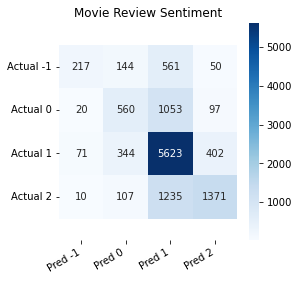

In [109]:
XtreeScoreDict = evaluateModel(Xtree_fit, X_test, y_test, title_(Xtree))
showFormattedConfusionMatrix(y_test, y_prediction_Xtree)

## 5. Linear Support Vector Classifier (SVC)

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The algorithm creates a line or a hyperplane which separates the data into classes.

In [147]:
SVC_model = SVC(kernel='rbf')
SVC_fit = SVC_model.fit(X_train, y_train)

In [148]:
y_prediction_SVC = SVC_model.predict(X_test)


*** SVC ***
Accuracy:  0.6592498946481248
Precision: 0.6984266615933116
Recall:    0.6592498946481248
F1:        0.6086068279316919



[[  89   78  767   38]
 [   0  370 1298   62]
 [   0   95 6056  289]
 [   0   32 1384 1307]]


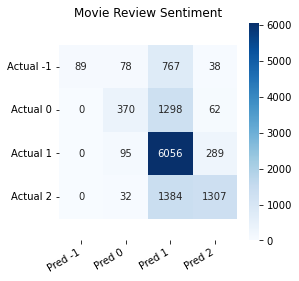

In [149]:
svcScoreDict = evaluateModel(SVC_fit, X_test, y_test, title_(SVC_model))
showFormattedConfusionMatrix(y_test, y_prediction_SVC)

## 6. K Neighbors Classifier

K Neighbors Classifier works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

In [120]:
KNN = KNeighborsClassifier()
KNN_fit = KNN.fit(X_train, y_train)

In [121]:
y_prediction_KNN = KNN.predict(X_test)


*** KNeighborsClassifier ***
Accuracy:  0.34943109987357773
Precision: 0.6360792004379421
Recall:    0.34943109987357773
F1:        0.36476786442165693



[[  85  749  133    5]
 [  22 1393  303   12]
 [ 133 3906 2341   60]
 [  13 1963  420  327]]


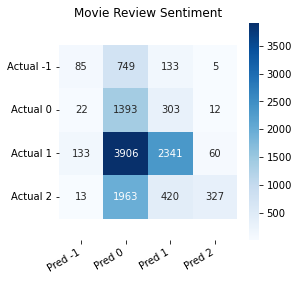

In [122]:
knnScoreDict = evaluateModel(KNN_fit, X_test, y_test, title_(KNN))
showFormattedConfusionMatrix(y_test, y_prediction_KNN)

## 7.Bernoulli Naive Bayes

Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.

In [123]:
BNBmodel = BernoulliNB()
BNBmodel_fit = BNBmodel.fit(X_train, y_train)

In [124]:
y_prediction_BNB = BNBmodel.predict(X_test)


*** BernoulliNB ***
Accuracy:  0.5485882848714707
Precision: 0.6506064012050449
Recall:    0.5485882848714707
F1:        0.3952093967740433



[[   0    0  969    3]
 [   0    3 1726    1]
 [   0    0 6437    3]
 [   0    0 2654   69]]


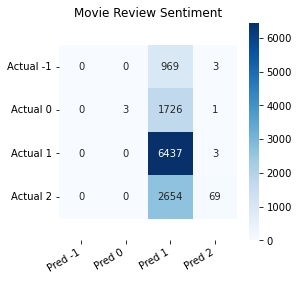

In [125]:
bnbScoreDict = evaluateModel(BNBmodel_fit, X_test, y_test, title_(BNBmodel))
showFormattedConfusionMatrix(y_test, y_prediction_BNB)

# Model Comparisons

In [151]:
lrScoreDf = pd.DataFrame(lrScoreDict, index=["Logistic Regression"])
treeScoreDf = pd.DataFrame(TreeScoreDict, index=["Decision Tree"])
rfScoreDf = pd.DataFrame(rfScoreDict, index=["Random Forest Classification"])
xtreeScoreDf = pd.DataFrame(XtreeScoreDict, index=["Extra Trees Classification"])
knnScoreDf = pd.DataFrame(knnScoreDict, index=["K Neighbors Classification"])
svcScoreDf = pd.DataFrame(svcScoreDict, index=["Linear Support Vector Classifier Classification"])
BNBScoreDf = pd.DataFrame(bnbScoreDict, index=["Bernoulli Naive Bayes"])

clsCompDf = pd.concat([lrScoreDf, treeScoreDf, rfScoreDf, xtreeScoreDf, knnScoreDf, svcScoreDf,BNBScoreDf])

clsCompDf.sort_values(by=["accuracy", "f1"], ascending = False)

,accuracy,recall,precision,f1
Logistic Regression,0.685124,0.685124,0.675523,0.665132
Linear Support Vector Classifier Classification,0.659250,0.659250,0.698427,0.608607
Extra Trees Classification,0.654952,0.654952,0.650720,0.629036
Random Forest Classification,0.645849,0.645849,0.656852,0.608073
Decision Tree,0.590055,0.590055,0.569862,0.556360
Bernoulli Naive Bayes,0.548588,0.548588,0.650606,0.395209
K Neighbors Classification,0.349431,0.349431,0.636079,0.364768


In [159]:
new_daf = pd.DataFrame(y_prediction_reg, columns=['sentiment'])
new_daf.shape

(11865, 1)

In [154]:
output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission2 = output.join(new_daf)
submission2.to_csv('submission_4.csv', index=False)

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---



Evaluating the performance of a model is one of the core stages in the data science process. It indicates how successful the scoring (predictions) of a dataset has been by a trained model.

Training the models and calclating the precision recall f1-score support ,accuracy and Comfusion matrix


In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
y_prediction = model.predict(X_test)

# Conclusion